# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [92]:
# enter your code here
df_1 = da.query("RIAGENDR == 2 & RIDAGEYR>=35 & RIDAGEYR<=50")[["DMDMARTL","DMDEDUC2"]]
df_1["DMDMARTL"]=df_1["DMDMARTL"].apply(lambda x: "married" if x == 1 else "not_married")
df_1["DMDEDUC2"] =df_1["DMDEDUC2"].apply(lambda x: "college" if x == 5 else "not_college")
df_1_total=pd.crosstab(df_1['DMDMARTL'], df_1['DMDEDUC2'])
df_1_total

DMDEDUC2,college,not_college
DMDMARTL,,
married,162,287
not_married,72,266


In [93]:
df_1_total['college']/(df_1_total['college']+df_1_total['not_college'])

DMDMARTL
married        0.360802
not_married    0.213018
dtype: float64

In [87]:
df_1_total.sum(axis=1)

DMDMARTL
married        449
not_married    338
dtype: int64

In [94]:
married_ci = sm.stats.proportion_confint(df_1_total.iloc[0,0],df_1_total.sum(axis=1)[0])
not_married_ci = sm.stats.proportion_confint(df_1_total.iloc[1,0],df_1_total.sum(axis=1)[1])
print(f"married ci:{married_ci}; \nnot married ci:{not_married_ci}")

married ci:(0.31638193710753626, 0.4052216263668512); 
not married ci:(0.16936816767089768, 0.2566673352876822)


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

In [95]:
print(np.diff(married_ci),np.diff(not_married_ci))

[0.08883969] [0.08729917]


ci is calculated as:
$$estimator +- t*me$$
even though married with college degree has a smaller me but it has a larger estimator.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

we are 95% sure that of all the women between [35,50] in the whole population, 31.6% to 40.5% are married and have a college; 16.9% to 25.7% are not married and have a college degree

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [124]:
# enter your code here
df_2=da[['SMQ020','RIAGENDR']]
df_2['SMQ020']=df_2['SMQ020'].apply(lambda x: "yes" if x == 1 else 'no')
df_2['RIAGENDR'] = df_2['RIAGENDR'].apply(lambda x: "male" if x == 1 else "female")
df_2_ct = pd.crosstab(df_2['SMQ020'],df_2['RIAGENDR'])
df_2_ct

RIAGENDR,female,male
SMQ020,,
no,2070,1346
yes,906,1413


In [125]:
df_2_ct.sum(axis = 1)[1]

2319

In [141]:
female_sm = sm.stats.proportion_confint(df_2_ct.iloc[1,0],df_2_ct.sum(axis = 1)[1])
male_sm = sm.stats.proportion_confint(df_2_ct.iloc[1,1],df_2_ct.sum(axis = 1)[1])
print(f"female ci:{female_sm}; \nmale ci:{male_sm}")

female ci:(0.37082779392969883, 0.41054348679475133); 
male ci:(0.5894565132052486, 0.6291722060703012)


In [142]:
f_pro = df_2_ct.iloc[1,0]/df_2_ct.sum(axis=1)[1]
f_se = np.sqrt(f_pro*(1-f_pro)/df_2_ct.sum(axis = 1)[1])
m_pro = df_2_ct.iloc[1,1]/df_2_ct.sum(axis=1)[1]
m_se = np.sqrt(m_pro*(1-m_pro)/df_2_ct.sum(axis = 1)[1])
dif = f_pro-m_pro
dif

-0.21862871927554983

In [143]:
se_diff= np.sqrt(f_se**2+m_se**2)
dif_ci = (dif-1.96*se_diff, dif+ 1.96*se_diff)
dif_ci

(-0.2467124710654801, -0.19054496748561955)

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

to see if there is a true proportional difference in different gender group

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

In [144]:
np.diff(female_sm),np.diff(male_sm),np.diff(dif_ci)

(array([0.03971569]), array([0.03971569]), array([0.0561675]))

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [169]:
# enter your code here
def cen_inch(x, invert= False):
    if invert == False:
        return x/2.54
    else:
        return np.array(x)*2.54

In [150]:
da['BMXHT'].isna().sum()

62

In [171]:
cm_ic = sm.stats.DescrStatsW(da['BMXHT'].dropna(),ddof=1).zconfint_mean()
cm_ic

(165.88055125872887, 166.40511769949427)

In [168]:
inch_ic = sm.stats.DescrStatsW(da['BMXHT'].dropna().apply(cen_inch)).zconfint_mean()
inch_ic

(65.30730364516884, 65.51382586594264)

In [170]:
cen_inch(inch_ic,invert=True)

array([165.88055126, 166.4051177 ])

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

In [187]:
np.diff(cm_ic)[0],(np.diff(inch_ic)*2.54)[0]

(0.5245664407653976, 0.5245664407654311)

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [190]:
da['RIDAGEYR'].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [235]:
# enter your code here
da['agebin']=pd.cut(da['RIDAGEYR'],(18,28,38,48,58,68,78,88), include_lowest=True)
df_4=da.groupby(['agebin',da['RIAGENDR'].replace({1:'male',2:'female'})])['BMXBMI'].agg([np.mean,np.std,np.size]).unstack()
df_4

mean                  std             size       
RIAGENDR           female       male    female      male female   male
agebin                                                                
(17.999, 28.0]  27.822776  26.969515  7.960991  6.779437  568.0  521.0
(28.0, 38.0]    29.943443  29.697180  7.959097  6.726690  494.0  467.0
(38.0, 48.0]    31.003733  29.514646  8.044642  6.104950  514.0  398.0
(48.0, 58.0]    30.787361  29.385132  7.647590  6.151534  454.0  419.0
(58.0, 68.0]    31.054664  29.232462  7.779502  5.959024  466.0  470.0
(68.0, 78.0]    30.537818  28.720270  6.780588  5.336652  279.0  307.0
(78.0, 88.0]    27.850000  27.464368  5.483781  4.695650  201.0  177.0

In [236]:
df_4['diff']=df_4['mean','female']-df_4['mean','male']
df_4

mean                  std             size         \
RIAGENDR           female       male    female      male female   male   
agebin                                                                   
(17.999, 28.0]  27.822776  26.969515  7.960991  6.779437  568.0  521.0   
(28.0, 38.0]    29.943443  29.697180  7.959097  6.726690  494.0  467.0   
(38.0, 48.0]    31.003733  29.514646  8.044642  6.104950  514.0  398.0   
(48.0, 58.0]    30.787361  29.385132  7.647590  6.151534  454.0  419.0   
(58.0, 68.0]    31.054664  29.232462  7.779502  5.959024  466.0  470.0   
(68.0, 78.0]    30.537818  28.720270  6.780588  5.336652  279.0  307.0   
(78.0, 88.0]    27.850000  27.464368  5.483781  4.695650  201.0  177.0   

                    diff  
RIAGENDR                  
agebin                    
(17.999, 28.0]  0.853261  
(28.0, 38.0]    0.246263  
(38.0, 48.0]    1.489086  
(48.0, 58.0]    1.402230  
(58.0, 68.0]    1.822202  
(68.0, 78.0]    1.817548  
(78.0, 88.0]    0.385632

In [251]:
# female standard error
fse = df_4['std','female']/np.sqrt(df_4['size','female'])
# male se
mse = df_4['std','male']/np.sqrt(df_4['size','male'])
# standard error
df_4['se']=np.sqrt(fse**2+mse**2)
# lower bound
df_4['lb'] = df_4['diff']-1.96*df_4['se']
# upper bound
df_4['ub']= df_4['diff']+1.96*df_4['se']
df_4

mean                  std             size         \
RIAGENDR           female       male    female      male female   male   
agebin                                                                   
(17.999, 28.0]  27.822776  26.969515  7.960991  6.779437  568.0  521.0   
(28.0, 38.0]    29.943443  29.697180  7.959097  6.726690  494.0  467.0   
(38.0, 48.0]    31.003733  29.514646  8.044642  6.104950  514.0  398.0   
(48.0, 58.0]    30.787361  29.385132  7.647590  6.151534  454.0  419.0   
(58.0, 68.0]    31.054664  29.232462  7.779502  5.959024  466.0  470.0   
(68.0, 78.0]    30.537818  28.720270  6.780588  5.336652  279.0  307.0   
(78.0, 88.0]    27.850000  27.464368  5.483781  4.695650  201.0  177.0   

                    diff        se        lb        ub  
RIAGENDR                                                
agebin                                                  
(17.999, 28.0]  0.853261  0.446986 -0.022831  1.729353  
(28.0, 38.0]    0.246263  0.474473 -0.683705  1.176230  
(38.0, 48.0]    1.489086  0.468563  0.570703  2.407470  
(48.0, 58.0]    1.402230  0.468120  0.484714  2.319745  
(58.0, 68.0]    1.822202  0.453239  0.933853  2.710551  
(68.0, 78.0]    1.817548  0.507502  0.822844  2.812252  
(78.0, 88.0]    0.385632  0.523624 -0.640672  1.411936

In [287]:
[str(i) for i in df_4.index]

['(17.999, 28.0]',
 '(28.0, 38.0]',
 '(38.0, 48.0]',
 '(48.0, 58.0]',
 '(58.0, 68.0]',
 '(68.0, 78.0]',
 '(78.0, 88.0]']

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

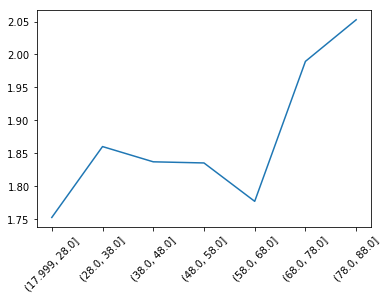

In [291]:
sns.lineplot(x = [str(i) for i in df_4.index],y= abs(df_4['lb']-df_4['ub']).values)
plt.xticks(rotation = 45);

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [298]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,agebin
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,"(58.0, 68.0]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,"(48.0, 58.0]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,"(68.0, 78.0]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,"(48.0, 58.0]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,"(38.0, 48.0]"


In [304]:
# enter code here
sy1_ci = sm.stats.DescrStatsW(da['BPXSY1'].dropna()).zconfint_mean()
sy2_ci = sm.stats.DescrStatsW(da['BPXSY2'].dropna()).zconfint_mean()
sy1_ci,sy2_ci

((124.59174272058787, 125.57748520016754),
 (124.29493306967777, 125.27110125733216))

In [306]:
diff_ci = sm.stats.DescrStatsW((da['BPXSY1']-da['BPXSY2']).dropna()).zconfint_mean()
diff_ci

(0.5400000439676835, 0.809972017868785)

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

no, lower bound of ci is above 0

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

In [308]:
np.diff(sy1_ci),np.diff(sy2_ci),np.diff(diff_ci)

(array([0.98574248]), array([0.97616819]), array([0.26997197]))

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [321]:
# insert your code here
df_6= da[['SMQ020','RIDAGEYR']]
df_6['SMQ020']= df_6['SMQ020'].apply(lambda x: "smoker" if x == 1 else "non_smoker")
df_6

,SMQ020,RIDAGEYR
0,smoker,62
1,smoker,53
2,smoker,78
3,non_smoker,56
4,non_smoker,42
5,non_smoker,72
6,smoker,22
7,non_smoker,32
8,non_smoker,18
9,non_smoker,56


In [324]:
df_agg = df_6.groupby('SMQ020').agg([np.size,np.mean,np.std])
df_agg

RIDAGEYR                      
               size       mean        std
SMQ020                                   
non_smoker     3416  45.306792  18.568337
smoker         2319  52.096593  17.461141

In [342]:
diff = df_agg.iloc[1,1]-df_agg.iloc[0,1]
df_agg['se']=df_agg['RIDAGEYR','std']/np.sqrt(df_agg['RIDAGEYR','size'])
se = np.sqrt(sum(df_agg['se']**2))
low = diff- 1.96*se
up = diff+ 1.96*se

In [343]:
low, up

(5.84491257601365, 7.734691004226155)

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

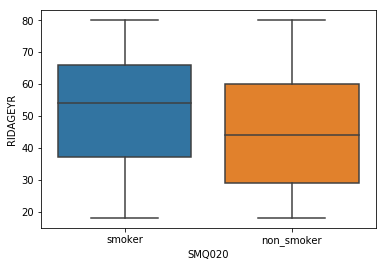

In [349]:
# insert your code here
sns.boxplot(data = df_6, x = 'SMQ020',y ='RIDAGEYR')

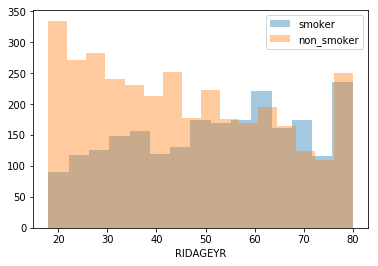

In [363]:
sns.distplot(df_6.query("SMQ020=='smoker'")['RIDAGEYR'],kde=0, label= "smoker")
sns.distplot(df_6.query("SMQ020=='non_smoker'")['RIDAGEYR'],kde=0, label= "non_smoker")
plt.legend(loc = 0);

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

smoker